#### prof. Davi rocha

Nosso objetivo neste projeto será prever se um paciente poderá ser readmitido em uma clínica no período de 30 dias após alta. Para isso, faremos a construção de diversos modelos preditivos usando registros eletrônicos de saúde de uma clínica fictícia.

Esse projeto terá como base uma pesquisa realizada em 2018, chamada:

Using Electronic Health Records and Machine Learning to Make Medical-Related Predictions from Non-Medical Data

https://ieeexplore.ieee.org/document/8614004

### Registros Eletrônicos de Saúde (Electronic Health Records)

Um Registro Eletrônico de Saúde (Electronic Health Records - EHR) é uma versão digital da ficha de papel de um paciente. Os EHRs são registros em tempo real, centrados no paciente, que tornam as informações disponíveis instantânea e seguramente para usuários autorizados. Embora um EHR contenha os históricos médicos e de tratamento dos pacientes, um sistema de EHR é construído para ir além dos dados clínicos coletados no consultório de um prestador de serviços e pode incluir uma visão mais ampla do atendimento de um paciente. Os EHRs são uma parte vital da TI em saúde e podem:

- Conter o histórico médico do paciente, diagnósticos, medicamentos, planos de tratamento, datas de imunização, alergias, imagens de radiologia e resultados laboratoriais e de testes.


- Permitir acesso a ferramentas baseadas em evidências que os provedores podem usar para tomar decisões sobre o atendimento de um paciente.


- Automatiza e simplifica o fluxo de trabalho do provedor.

Um dos principais recursos de um EHR é que as informações de saúde podem ser criadas e gerenciadas por provedores autorizados em um formato digital capaz de ser compartilhado com outros provedores em mais de uma organização de saúde. Os EHRs são construídos para compartilhar informações com outros prestadores de cuidados de saúde e organizações - como laboratórios, especialistas, instalações de imagens médicas, farmácias, instalações de emergência e clínicas de escolas e locais de trabalho - para que eles contenham informações de todos os clínicos envolvidos no atendimento de um paciente.

 ##  1) Carregando os Dados e Compreendendo as Variáveis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0,4.0) #mesmo tamanho paronizado para os graficos

In [ ]:
dados = pd.read_csv('dados/dataset.csv',index_col=[0])
dados.head()

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA,READMISSAO_30_DIAS
ID,,,,,,,,,,,,,
0,62.0,1,0,1,0,1,0,0,0,0,0,0,1
1,24.0,0,1,2,0,0,1,0,0,0,0,0,0
2,77.0,0,1,2,0,0,1,0,0,2,2,0,0
3,68.0,0,1,7,0,0,1,0,0,2,2,0,0
4,83.0,0,1,2,0,0,1,0,0,1,1,0,0


Dicionário de Dados

- IDADE - Idade do paciente (numérica)
- SEXO_F - paciente do sexo feminino (categórica)
- SEXO_M - paciente do sexo masculino (categórica)
- ADM_CORRENTE_DIAS - Dias desde a admissão atual (numérica)
- RECEB_MEDICAMENTOS - Recebeu medicamentos na última internação (categórica)
- FEZ_EXAMES - Fez exames na última internação (categórica)
- DEPEND_QUIMICO - Dependendo químico (categórica)
- FUMANTE - Fumante (categórica)
- ALCOOLISMO - Alcoolismo (categórica)
- NUM_DIAS_INT_PREVIA - Número de internações anteriores (numérica)
- ADM_PREVIA_DIAS - Dias da admissão anterior (numérica)
- NUM_DIAS_LIC_MEDICA - Licença médica (numérica)
- READMISSAO_30_DIAS - Readmissão dentro de 30 dias após a alta. Variável target. 0 - Não / 1 - Sim

In [ ]:
# shape dos dados
dados.shape

(117180, 13)

Há 117180 linhas e 13 colunas

In [ ]:
#Tipos de dados e outras informações
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117180 entries, 0 to 129999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   IDADE                117180 non-null  float64
 1   SEXO_F               117180 non-null  int64  
 2   SEXO_M               117180 non-null  int64  
 3   ADM_CORRENTE_DIAS    117180 non-null  int64  
 4   RECEB_MEDICAMENTOS   117180 non-null  int64  
 5   FEZ_EXAMES           117180 non-null  int64  
 6   DEPEND_QUIMICO       117180 non-null  int64  
 7   FUMANTE              117180 non-null  int64  
 8   ALCOOLISMO           117180 non-null  int64  
 9   NUM_DIAS_INT_PREVIA  117180 non-null  int64  
 10  ADM_PREVIA_DIAS      117180 non-null  int64  
 11  NUM_DIAS_LIC_MEDICA  117180 non-null  int64  
 12  READMISSAO_30_DIAS   117180 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 12.5 MB


#### Da analise acima já concluímos que não há nulos e que  todas as nossas variaveis foram classificads como numéricas pelo pandas.

In [ ]:
#Rsumo estatistico
dados.describe()

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA,READMISSAO_30_DIAS
count,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000
mean,65.066522,0.428239,0.571761,4.707680,0.160266,0.237020,0.597440,0.005274,0.008269,5.301988,12.328179,0.314456,0.189384
std,17.965229,0.494826,0.494826,6.257739,0.366854,0.425256,0.490416,0.072430,0.090559,14.324146,26.846820,3.366208,0.391815
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,78.000000,1.000000,1.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,12.000000,0.000000,0.000000
max,114.000000,1.000000,1.000000,307.000000,1.000000,1.000000,1.000000,1.000000,1.000000,170.000000,627.000000,315.000000,1.000000


In [ ]:
#Há linhas duplicadas

dados[dados.duplicated()]

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA,READMISSAO_30_DIAS
ID,,,,,,,,,,,,,
73,82.0,1,0,1,1,0,0,0,0,0,0,0,0
88,38.0,0,1,2,0,0,1,0,0,0,0,0,0
183,40.0,1,0,5,0,0,1,0,0,0,0,0,0
185,70.0,0,1,1,1,0,0,0,0,1,1,0,0
263,64.0,0,1,2,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129994,79.0,0,1,6,0,0,1,0,0,0,0,0,0
129995,79.0,0,1,1,1,0,0,0,0,1,1,0,0
129997,52.0,0,1,4,1,0,0,0,0,0,0,0,0


In [ ]:
dados.duplicated().sum()

60839

A analise acima indicou que há 60839 dados duplicados,porém podem se apcientes que possuem algumas caracteristicas identicas, por exemplo: dois pacientes podem ter a mesma idade, sexo, dias de internação, mesma quantide de exames, ETC. Pode ocorrer!

Vamos manter esses dados duplicados e verificar como os modelos performam! Pois não temos certeza, com as informações que temos se são dados duplicados por erro de coleta ou se existem pacientes com as mesmas caracteristicas       

In [ ]:
# Função para visualizar a distribuição de cada variável
def cria_histograma(dataset, features, rows, cols):
    fig = plt.figure(figsize = (20,20))

    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        dataset[feature].hist(bins = 20, ax = ax, facecolor = 'midnightblue')
        ax.set_title(feature + " Distribuição", color = 'DarkRed')

    fig.tight_layout()
    plt.show()

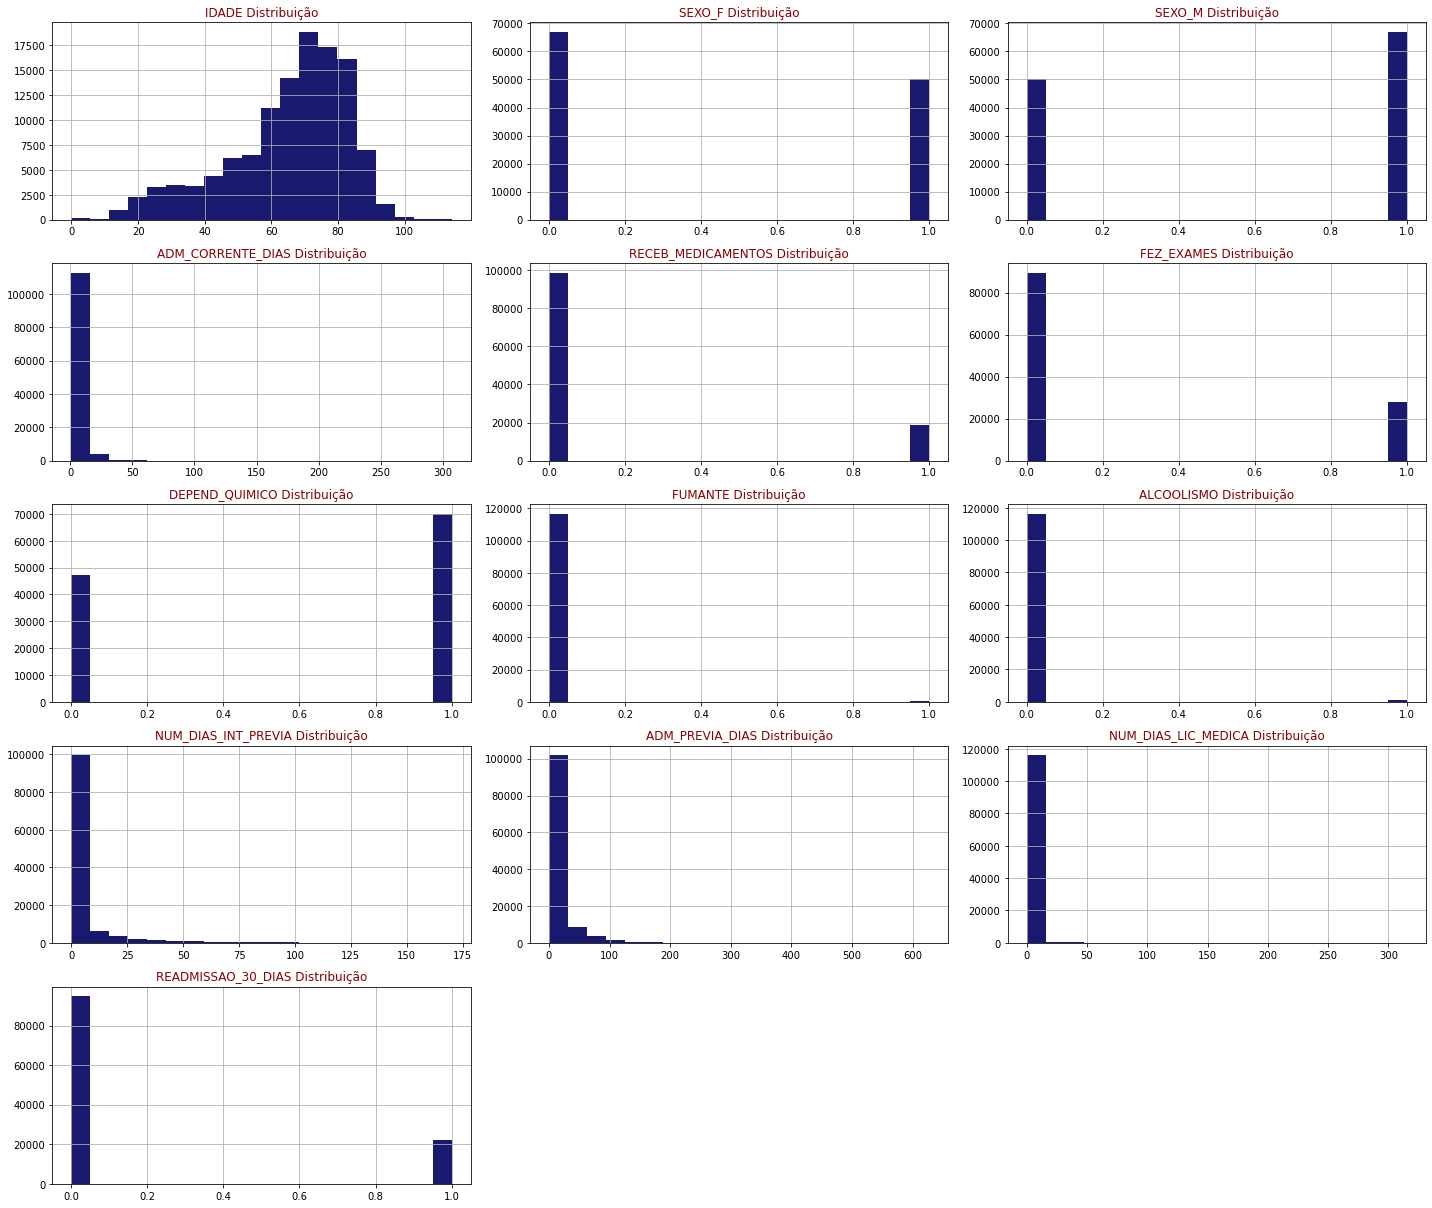

In [ ]:
# Executa a função
cria_histograma(dados, dados.columns, 6, 3)

#### Analise dos histogrmas:

- idade:

a) chama a atenção idades com valor zero, será que criannças com menos de um ano foram internadas? Ou erro de digitação?

b) existem idades maiores que 100. Seráum outlier?

Observe que esses itens a) e b) já apareceram no resumo estatístico(describe)

- sexo_F e sexo_M parecem estar ok

- em realçao a medicamentos parece que a maioria dos pacientes nao recebeu medicamento e a maioria também nao fez exames, será que está correto?

- na variavel dependente quimico cham a atenção que o grafico diz que a maioria é dependente quimico. Porém a pergunta que fica é dependente de que, remedios, drogas?

- nesse dataset diz que a maioria nao fuma e a maioria também não bebe. isso leva a inferir(semprovas) que talvez a depdendencia quimica vista anteriormentye seja de remedios mesmo... mas nao temos certeza. Geralmente quem usa drogas também fuma e bebe, ou pelo menos um dos dois...



- READMISSAO_30_DIAS:

dados desbalanceados, há mais dados em que não ocorreram readmissão

### Checando Outliers

Um outlier é um ponto ou conjunto de pontos que são muito diferentes de outros pontos, valores extremos. Às vezes, eles podem ser muito altos ou muito baixos. Geralmente, é uma boa ideia detectar e remover os valores discrepantes.

Os valores discrepantes são uma das principais razões para um modelo menos preciso.

Por isso, é uma boa ideia removê-los.

Na estatística descritiva, um gráfico de caixa (Boxplot) é um método para representar graficamente grupos de dados numéricos através de seus quartis. Os gráficos de caixa também podem ter linhas que se estendem verticalmente (ou horizontalmente) a partir das caixas (bigodes), indicando variabilidade fora dos quartis superior e inferior. Os outliers podem ser plotados como pontos individuais.

A definição acima sugere que, se houver um outlier, ele será plotado como ponto no boxplot.

O gráfico abaixo mostra dois pontos bem acima de 100 anos, estes são outliers, pois não estão incluídos na caixa, ou seja, nenhum lugar perto dos quartis. O mesmo raciocínio para os pontos abaixo de 20 anos.

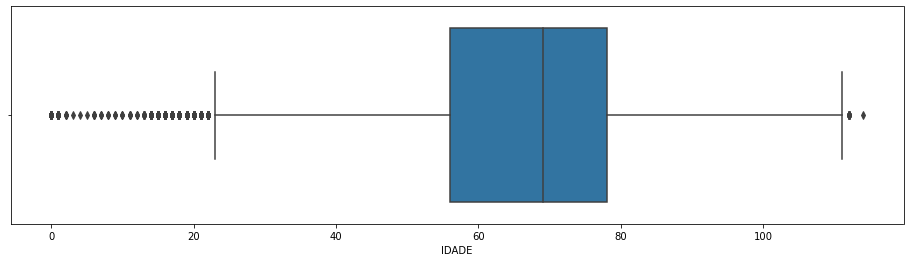

In [ ]:
# Visualizando os outliers da variável IDADE
sns.boxplot(x = dados['IDADE'])
plt.show()

Pergunta: Já que a mediana das idades pe de cerca de 70 anos, porque há nesses dados pessoas menores que 20 anos?
Que tipos de pessoas essa clinica atende, será que não atende só adultos? Será um erro de coleta de dados?
essa é a hora que precisariamos do conhecedor de negocio !!

Vamos tomar uma decisao aqui: Vamos retirar todas as linhas que tenham idade maior que 110 anos e menor que 5 anos.

Vamos testar assim, se necessário, apos avaliar o modelo podemos voltar e incluir esses dados ou aumentar o range de dados

In [ ]:
outliers_idade = dados[(dados['IDADE']> 110) | (dados['IDADE']<5)]
outliers_idade.head()

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA,READMISSAO_30_DIAS
ID,,,,,,,,,,,,,
5204,0.0,0,1,3,1,0,0,0,0,0,0,0,0
9588,0.0,1,0,1,0,1,0,0,0,0,0,0,0
12103,2.0,1,0,1,1,0,0,0,0,1,3,0,0
19961,0.0,0,1,13,0,0,1,0,0,0,0,0,0
21779,0.0,0,1,2,0,0,1,0,0,0,0,0,0


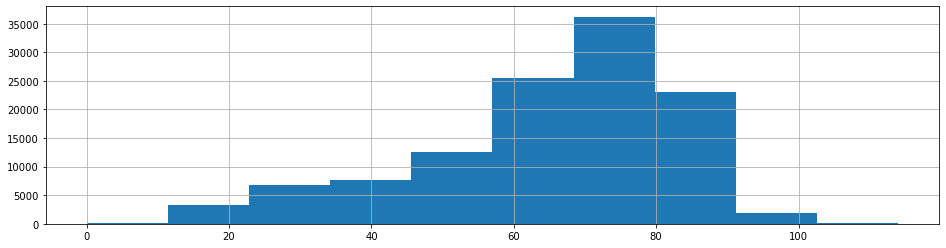

In [ ]:
#Histograma antes da retirda
dados.IDADE.hist();

In [ ]:
dados = dados.drop(outliers_idade.index)

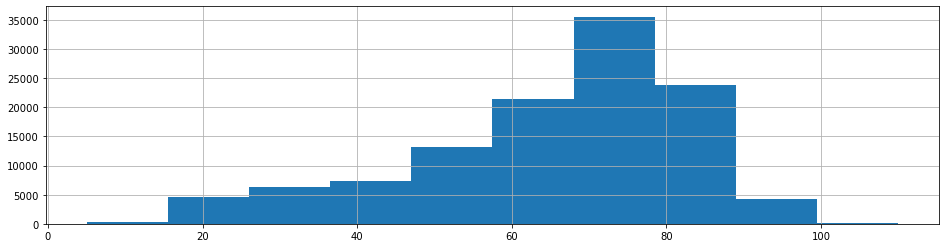

In [ ]:
#Histograma apos  retirada
dados.IDADE.hist();

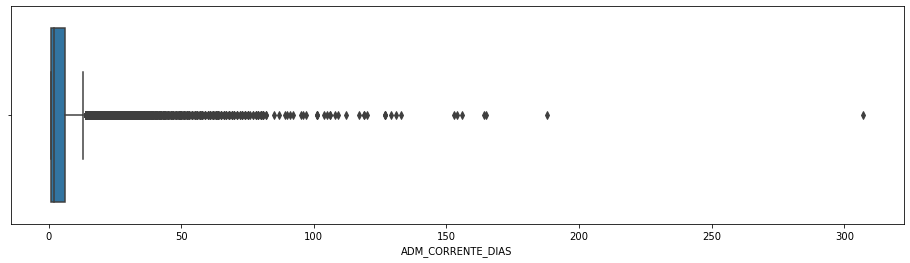

In [ ]:
# Visualizando os outliers da variável ADM_CORRENTE_DIAS
sns.boxplot(x = dados['ADM_CORRENTE_DIAS'])
plt.show()

In [ ]:
#Vamos remover outliers:

dados = dados.drop(dados[(dados['ADM_CORRENTE_DIAS']>180)].index)

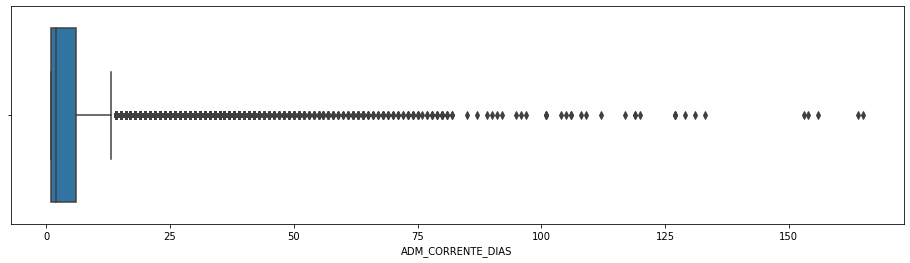

In [ ]:
# Visualizando os outliers da variável ADM_CORRENTE_DIAS
sns.boxplot(x = dados['ADM_CORRENTE_DIAS'])
plt.show()

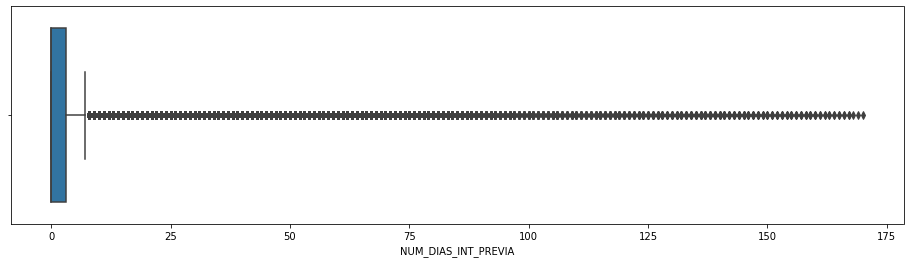

In [ ]:
# Visualizando os outliers da variável NUM_DIAS_INT_PREVIA
sns.boxplot(x = dados['NUM_DIAS_INT_PREVIA'])
plt.show()

<AxesSubplot:xlabel='ADM_PREVIA_DIAS'>

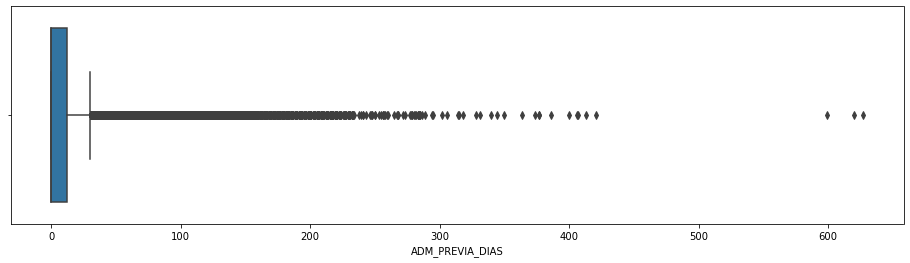

In [ ]:
# Visualizando os outliers da variável ADM_PREVIA_DIAS
sns.boxplot(x = dados['ADM_PREVIA_DIAS'])

<AxesSubplot:xlabel='ADM_PREVIA_DIAS'>

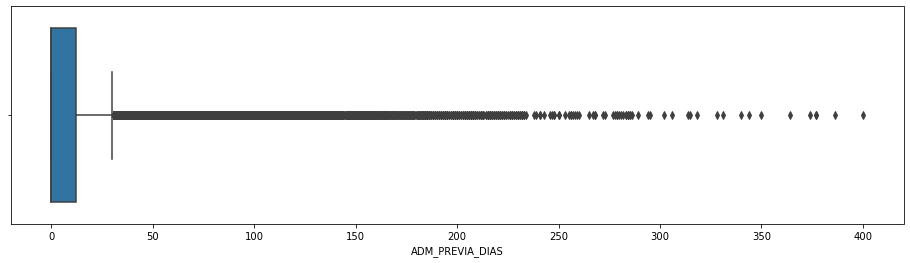

In [ ]:

dados = dados.drop(dados[(dados['ADM_PREVIA_DIAS']>400)].index)
sns.boxplot(x = dados['ADM_PREVIA_DIAS'])

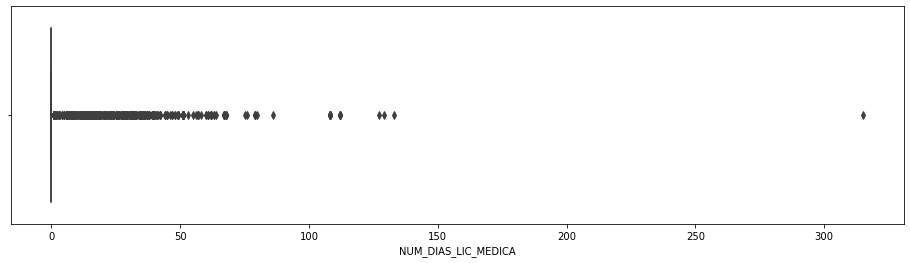

In [ ]:
# Visualizando os outliers da variável NUM_DIAS_LIC_MEDICA
sns.boxplot(x = dados['NUM_DIAS_LIC_MEDICA'])
plt.show()

<AxesSubplot:xlabel='NUM_DIAS_LIC_MEDICA'>

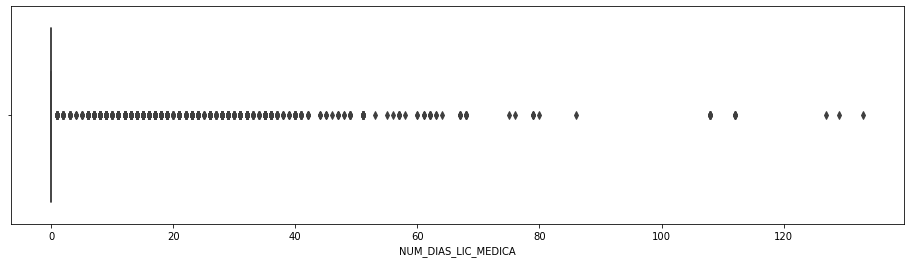

In [ ]:
dados = dados.drop(dados[(dados['NUM_DIAS_LIC_MEDICA']>150)].index)
sns.boxplot(x = dados['NUM_DIAS_LIC_MEDICA'])

### Correlação e Associação

In [ ]:
# Criando uma cópia do dataset original
dados_teste = dados.copy()

In [ ]:
dados_teste.head()

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA,READMISSAO_30_DIAS
ID,,,,,,,,,,,,,
0,62.0,1,0,1,0,1,0,0,0,0,0,0,1
1,24.0,0,1,2,0,0,1,0,0,0,0,0,0
2,77.0,0,1,2,0,0,1,0,0,2,2,0,0
3,68.0,0,1,7,0,0,1,0,0,2,2,0,0
4,83.0,0,1,2,0,0,1,0,0,1,1,0,0


In [ ]:
dados_teste.dtypes

IDADE                  float64
SEXO_F                   int64
SEXO_M                   int64
ADM_CORRENTE_DIAS        int64
RECEB_MEDICAMENTOS       int64
FEZ_EXAMES               int64
DEPEND_QUIMICO           int64
FUMANTE                  int64
ALCOOLISMO               int64
NUM_DIAS_INT_PREVIA      int64
ADM_PREVIA_DIAS          int64
NUM_DIAS_LIC_MEDICA      int64
READMISSAO_30_DIAS       int64
dtype: object

In [ ]:
# Convertendo as variáveis categóricas para o tipo categórico em Python
# Como queremos apenas avaliar a associação com a variável resposta estamos trabalhando com uma cópia do dataset original.
dados_teste['SEXO_F'] = dados_teste['SEXO_F'].astype('category')
dados_teste['SEXO_M'] = dados_teste['SEXO_M'].astype('category')
dados_teste['RECEB_MEDICAMENTOS'] = dados_teste['RECEB_MEDICAMENTOS'].astype('category')
dados_teste['FEZ_EXAMES'] = dados_teste['FEZ_EXAMES'].astype('category')
dados_teste['DEPEND_QUIMICO'] = dados_teste['DEPEND_QUIMICO'].astype('category')
dados_teste['FUMANTE'] = dados_teste['FUMANTE'].astype('category')
dados_teste['ALCOOLISMO'] = dados_teste['ALCOOLISMO'].astype('category')
dados_teste['READMISSAO_30_DIAS'] = dados_teste['READMISSAO_30_DIAS'].astype('category')

In [ ]:
dados_teste.dtypes

IDADE                   float64
SEXO_F                 category
SEXO_M                 category
ADM_CORRENTE_DIAS         int64
RECEB_MEDICAMENTOS     category
FEZ_EXAMES             category
DEPEND_QUIMICO         category
FUMANTE                category
ALCOOLISMO             category
NUM_DIAS_INT_PREVIA       int64
ADM_PREVIA_DIAS           int64
NUM_DIAS_LIC_MEDICA       int64
READMISSAO_30_DIAS     category
dtype: object

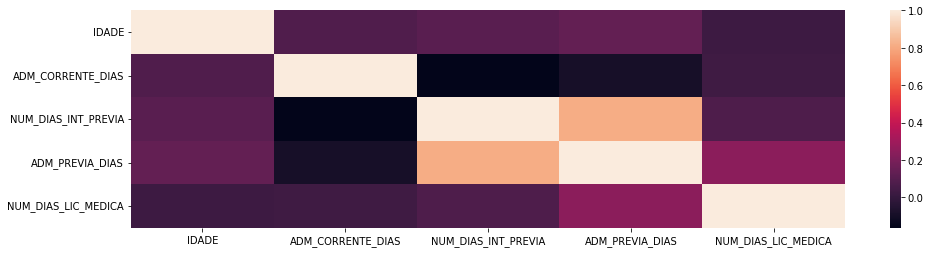

In [ ]:
# Coeficiente de correlação é calculado para variáveis numéricas
dados_teste_corr = dados_teste.corr()
sns.heatmap(dados_teste_corr)
plt.show()

Parace que a variavei Idade por exemplo nao tem correlação comas outras variaveis

In [ ]:
# Função para calcular a associação entre variáveis categóricas

# Pacote stats do Scipy
import scipy.stats as ss

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

# Em Estatística, Cramér-V é uma medida de associação entre duas variáveis categóricas, fornecendo um valor
# entre 0 e +1 (inclusive). É baseado na estatística do qui-quadrado (chi2) de Pearson e foi publicado
# por Harald Cramér em 1946.

# A Associação é um resultado no intervalo de [0,1], em que 0 significa nenhuma associação e 1 é associação completa.

# Função
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)

    # Teste qui-quadrado de independência de variáveis em uma tabela de contingência.
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [ ]:
# Coleta as variáveis categóricas do dataset
from pandas.api.types import is_categorical_dtype
from pandas.api.types import is_numeric_dtype

categorical_vars = []

for column in dados_teste:
    if is_categorical_dtype(dados_teste[column]):
        categorical_vars.append(column)

In [ ]:
categorical_vars

['SEXO_F',
 'SEXO_M',
 'RECEB_MEDICAMENTOS',
 'FEZ_EXAMES',
 'DEPEND_QUIMICO',
 'FUMANTE',
 'ALCOOLISMO',
 'READMISSAO_30_DIAS']

In [ ]:
y = 'READMISSAO_30_DIAS'

print('\nA Associação é um resultado no intervalo de [0,1], em que 0 significa nenhuma associação e 1 é associação completa.')
print('\n')

for var in categorical_vars:
    print('Associação da Variável ' + var + ' com a variável resposta:',
          cramers_v(dados_teste[var], dados_teste[y]))


A Associação é um resultado no intervalo de [0,1], em que 0 significa nenhuma associação e 1 é associação completa.


Associação da Variável SEXO_F com a variável resposta: 0.08140312484489556
Associação da Variável SEXO_M com a variável resposta: 0.08140312484489556
Associação da Variável RECEB_MEDICAMENTOS com a variável resposta: 0.14274972262281213
Associação da Variável FEZ_EXAMES com a variável resposta: 0.3512134549958696
Associação da Variável DEPEND_QUIMICO com a variável resposta: 0.21078933128660998
Associação da Variável FUMANTE com a variável resposta: 0.08791877346862986
Associação da Variável ALCOOLISMO com a variável resposta: 0.0151160465712889
Associação da Variável READMISSAO_30_DIAS com a variável resposta: 0.9999721770541886


### Pré-Processamento

In [ ]:
dados.head()

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA,READMISSAO_30_DIAS
ID,,,,,,,,,,,,,
0,62.0,1,0,1,0,1,0,0,0,0,0,0,1
1,24.0,0,1,2,0,0,1,0,0,0,0,0,0
2,77.0,0,1,2,0,0,1,0,0,2,2,0,0
3,68.0,0,1,7,0,0,1,0,0,2,2,0,0
4,83.0,0,1,2,0,0,1,0,0,1,1,0,0


Vamos verificar se a variavel resposta esta desbalanceada

In [ ]:
# Verificando se a variável resposta está balanceada
target_count = dados.READMISSAO_30_DIAS.value_counts()
target_count

0    94827
1    22173
Name: READMISSAO_30_DIAS, dtype: int64

Pelo que vimos acima sim!! há muito mais valores para a não readmissão

Podemos verificar isso visualmente:

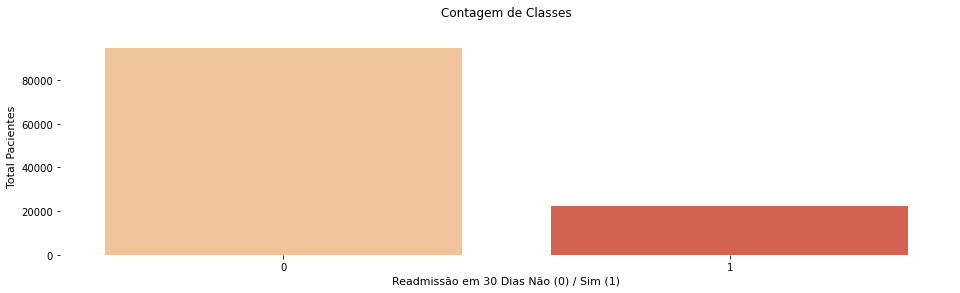

In [ ]:
sns.countplot(dados.READMISSAO_30_DIAS, palette ='OrRd')
plt.box(False)
plt.xlabel('Readmissão em 30 Dias Não (0) / Sim (1)', fontsize = 11)
plt.ylabel('Total Pacientes', fontsize = 11)
plt.title('Contagem de Classes\n')
plt.show()

O modelo não pode ser treinado com a clsse desbalanceada, pois senão ele vai fazer previsões majoritariamente da classe
que possue maior quantidade de valor que é a não readmissão(0), porém estamos iteressados na readmissão, porisso precisamos balancear os dados

In [ ]:
# Variáveis Explicativas
dados.iloc[:, 0:12]

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA
ID,,,,,,,,,,,,
0,62.0,1,0,1,0,1,0,0,0,0,0,0
1,24.0,0,1,2,0,0,1,0,0,0,0,0
2,77.0,0,1,2,0,0,1,0,0,2,2,0
3,68.0,0,1,7,0,0,1,0,0,2,2,0
4,83.0,0,1,2,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
129995,79.0,0,1,1,1,0,0,0,0,1,1,0
129996,61.0,0,1,1,0,1,0,0,0,1,9,0
129997,52.0,0,1,4,1,0,0,0,0,0,0,0


In [ ]:
dados.iloc[:,-1]

ID
0         1
1         0
2         0
3         0
4         0
         ..
129995    0
129996    1
129997    0
129998    0
129999    0
Name: READMISSAO_30_DIAS, Length: 117000, dtype: int64

In [ ]:
# Importa a função
# Se necessário, instale o pacote:
# pip install imblearn
from imblearn.over_sampling import SMOTE

# Seed para reproduzir o mesmo resultado
seed = 100

# Separa X e y
X = dados.iloc[:, 0:12]
y = dados.iloc[:, -1]

# Cria o balanceador SMOTE
smote_bal = SMOTE(random_state = seed)

# Aplica o balanceador
X_res, y_res = smote_bal.fit_resample(X, y)

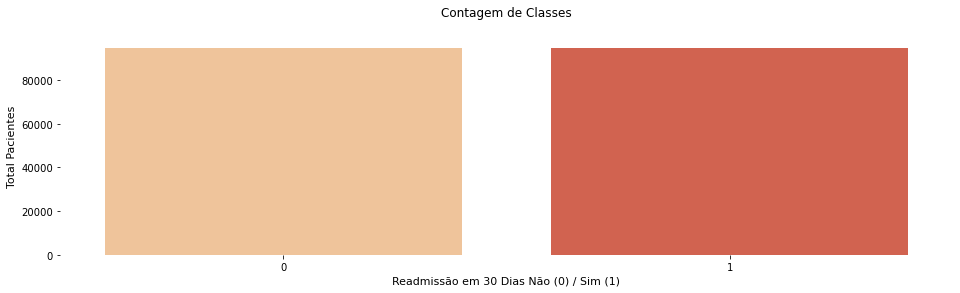

In [ ]:
# Plot
sns.countplot(y_res, palette = "OrRd")
plt.box(False)
plt.xlabel('Readmissão em 30 Dias Não (0) / Sim (1)', fontsize = 11)
plt.ylabel('Total Pacientes', fontsize = 11)
plt.title('Contagem de Classes\n')
plt.show()

In [ ]:
X = X_res
Y = y_res

In [ ]:
X.shape

(189654, 12)

In [ ]:
Y.shape

(189654,)

In [ ]:
# Divisão dos dados em treino e teste
from sklearn.model_selection import train_test_split

test_size = 0.1
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = test_size, random_state = 7)

## Construção dos Modelos Preditivos

In [ ]:
# Imports
import keras
import tensorflow
import sklearn
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report, matthews_corrcoef, accuracy_score
from sklearn.metrics import roc_curve, auc

In [ ]:
tensorflow.__version__

'2.10.0'

In [ ]:
keras.__version__

'2.10.0'

In [ ]:
sklearn.__version__

'1.1.2'

#### Versão 1 - Regressão Logística

In [ ]:
# Cria e treina o modelo
modelo_v1 = LogisticRegression(max_iter = 800)
modelo_v1.fit(X_treino, Y_treino)

LogisticRegression(max_iter=800)

In [ ]:
# Previsões (probabilidades)
previsoes_v1 = modelo_v1.predict_proba(X_teste)
previsoes_v1

array([[0.73300947, 0.26699053],
       [0.17975549, 0.82024451],
       [0.00108831, 0.99891169],
       ...,
       [0.19824588, 0.80175412],
       [0.00142387, 0.99857613],
       [0.20299727, 0.79700273]])

In [ ]:
# Previsões (classes)
previsoes_v1 = modelo_v1.predict(X_teste)
previsoes_v1

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

### Matriz de Confusão(resumo)

A matriz de confusão é uma ferramenta fundamental na avaliação de modelos de classificação. Ela permite analisar o desempenho de um modelo ao comparar as previsões feitas pelo modelo com os valores reais dos dados.

Uma matriz de confusão é composta por quatro elementos principais:

- **Verdadeiro Positivo (VP)**: Número de vezes em que o modelo previu corretamente uma classe positiva.

- **Verdadeiro Negativo (VN)**: Número de vezes em que o modelo previu corretamente uma classe negativa.

- **Falso Positivo (FP)**: Número de vezes em que o modelo previu erroneamente uma classe positiva quando a verdadeira classe era negativa.

- **Falso Negativo (FN)**: Número de vezes em que o modelo previu erroneamente uma classe negativa quando a verdadeira classe era positiva.

A matriz de confusão é geralmente apresentada na seguinte forma:

|           | Classe Positiva | Classe Negativa |
|-----------|-----------------|-----------------|
| Positivo  | VP              | FP              |
| Negativo  | FN              | VN              |

A partir da matriz de confusão, é possível calcular várias métricas de avaliação, incluindo:

- **Acurácia (Accuracy)**: (VP + VN) / (VP + VN + FP + FN)

- **Precisão (Precision)**: VP / (VP + FP)

- **Revocação (Recall)**: VP / (VP + FN)

- **F1-Score**: 2 * (Precision * Recall) / (Precision + Recall)

Abaixo calculamos a matriz de confusão para os nosso modelo:


In [ ]:
matriz_v1 = confusion_matrix(Y_teste, previsoes_v1)
print(matriz_v1)

[[7814 1688]
 [2666 6798]]


### Relatório de Classificação (classification_report)

O `classification_report` é uma função da biblioteca scikit-learn que fornece uma análise detalhada das métricas de avaliação para um modelo de classificação. Ele é uma ferramenta valiosa para entender o desempenho do modelo em cada classe individualmente, além de fornecer uma visão geral das métricas agregadas.

O `classification_report` inclui as seguintes métricas para cada classe:

- **Precision**: A proporção de instâncias positivas previstas corretamente em relação ao total de instâncias previstas como positivas (VP / (VP + FP)).

- **Recall (Sensibilidade)**: A proporção de instâncias positivas previstas corretamente em relação ao total de instâncias reais positivas (VP / (VP + FN)).

- **F1-Score**: A média harmônica entre a precisão e o recall (2 * (Precision * Recall) / (Precision + Recall)).

- **Suporte**: O número total de instâncias de cada classe no conjunto de dados.

- **Acurácia**: A proporção de todas as previsões corretas em relação ao total de instâncias (VP + VN) / (VP + VN + FP + FN).

O relatório é organizado em forma de tabela, onde cada linha representa uma classe e as métricas são calculadas para essa classe específica. A última linha, geralmente rotulada como "média" ou "macro avg", fornece as médias das métricas para todas as classes.

O `classification_report` ajuda a identificar quais classes estão sendo bem classificadas pelo modelo e quais podem estar apresentando problemas. Isso é especialmente útil quando as classes têm distribuições desiguais no conjunto de dados.

Abaixo usamos o `classification_report` para o nosso modelo:

In [ ]:
# Relatório de classificação
classe_names = ['Não Readmitido (0)', 'Readmitido (1)']
report = classification_report(Y_teste, previsoes_v1, target_names = classe_names)
print(report)

                    precision    recall  f1-score   support

Não Readmitido (0)       0.75      0.82      0.78      9502
    Readmitido (1)       0.80      0.72      0.76      9464

          accuracy                           0.77     18966
         macro avg       0.77      0.77      0.77     18966
      weighted avg       0.77      0.77      0.77     18966



### Área sob a Curva ROC (AUC)

A Área sob a Curva ROC (AUC) é uma métrica comum utilizada para avaliar a capacidade discriminativa de modelos de classificação binária. A curva ROC (Receiver Operating Characteristic) é uma representação gráfica que mostra a relação entre a taxa de verdadeiros positivos (Recall) e a taxa de falsos positivos para diferentes limiares de classificação.

A AUC mede a área sob a curva ROC e fornece uma medida agregada do desempenho do modelo em todas as possíveis configurações de limiar. Quanto maior a AUC, melhor o modelo é em distinguir entre as classes.

Principais pontos sobre a AUC:

- A AUC varia entre 0 e 1. Um modelo com AUC igual a 0,5 tem desempenho semelhante ao de um classificador aleatório, enquanto um AUC de 1 indica um classificador perfeito.

- A AUC é útil quando as classes têm distribuições desiguais ou quando o custo de falsos positivos e falsos negativos é diferente.

- A AUC não depende do limiar de classificação, ou seja, é uma métrica que considera todas as possíveis configurações de limiar.


In [ ]:
y_pred_probs = modelo_v1.predict_proba(X_teste)[:,1] # Usamos [:,1] para buscar as probabilidades da classe positiva.
print(roc_auc_score(Y_teste, y_pred_probs))

0.8356819828205407


A interpretação da AUC é a seguinte:

AUC próximo a 0,5: O modelo não é capaz de distinguir bem entre as classes.

AUC entre 0,5 e 0,7: O modelo tem um desempenho moderado na diferenciação das classes.

AUC acima de 0,7: O modelo tem um bom desempenho na classificação das classes.

A AUC é uma métrica valiosa para avaliar a qualidade geral de um modelo de classificação, fornecendo uma medida robusta da sua capacidade de discriminação.

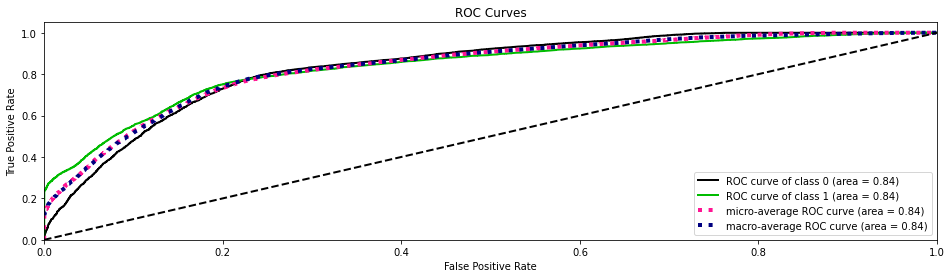

In [ ]:
# Calcula a Curva ROC para cada classe
y_probs_v1 = modelo_v1.predict_proba(X_teste)
skplt.metrics.plot_roc_curve(Y_teste, y_probs_v1)
plt.show()